# 認識処理工学特論レポート２

# 学生番号: 1930032
# 氏名: 山本雄介

レポート課題：パターンの特徴量とスケールとの関係について実例を示して正規化が特徴を希釈する場合、強調する場合を上げて論ぜよ。

正規化は分散ベースの正規化。各特徴量のパワーに基づく正規化とみなせる。

そのため、パワー自体に意味がある場合は特徴を希釈化し、パワー自体にそれほど意味がない場合は特徴を強調できるのではないか、と考察する。また、多変量データで変数ごとのパワーがほぼ同じ場合、正規化によって元のデータの持つ意味は変わってしまうが、同じパワーを持つ値で割ることによって何か新しい情報が得られるわけではなく、希釈化が起きると考えられる。逆に変数ごとのパワーに大きなばらつきがある場合、パワーを使って規格化することで、異なるパワーを持つ変数の比較が容易となり、変数ごとの特徴や違いが強調できると考察する。

## 特徴を希釈化する場合
パワー自体に意味がある例として、異常値を持つデータが考えられる。例えば学生の身長のデータがあったとして、その中に一つだけ、明らかに身長のデータではないようなものが混ざって居るケースを考える。

In [42]:
x1 = np.array([165, 170, 178, 168, 177, 180, 100000])
print("Variance: {:,.1f}  Variance without 100000: {:.1f}".format(x1.var(),x1[:6].var()))

Variance: 1,220,256,752.9  Variance without 100000: 31.3


この時、最後の要素である100000は、他の数字と比べて明らかに大きく、このままの数字で見たときに異常なデータであることがすぐにわかる。また、分散も大きな値を取り、仮に最後の要素がなかった場合、分散は31.3であるのに対し、このデータを正規化した場合、1,220,256,752と桁が異なる。つまり、データの持つパワーにデータが持つ特徴が表れていると考えられる。

このデータを正規化した場合、

In [43]:
np.round((x1 - x1.mean())/x1.std(), 2)

array([-0.41, -0.41, -0.41, -0.41, -0.41, -0.41,  2.45])

元の身長のデータは-0.41ぐらいに変換されるのに対し、100000は2.45に変換される。このとき、元データで持っていた各身長データのばらつきが、小数点第二までは同じ数字となり、区別がつかなくなってしまう。加えて、明らかに大きな数字であった100000が2.45と一桁の数字に変換されてしまい、明らかな異常値なのか、他の数字と似たような数字なのか、区別がつかなくなってしまう。

もう一つ正規化が特徴を希釈化する例として、多変量での順位データが考えられる。例えば二人の人が５つのレストランを評価して、順位づけしたようなデータがあったとする。この場合、二人のデータはそれぞれ1から５までの値をとるため、分散を計算すると同じ値になる。

In [53]:
rank1 = np.array([3,4,1,2,5])
rank2 = np.array([4,2,1,3,5])
print("Variance of 1st data {:.2f}  Variance of 2nd data {:.2f}".format(rank1.var(), rank2.var()))

Variance of 1st data 2.00  Variance of 2nd data 2.00


それぞれのデータを正規化をしてしまうと、変換された値の大小関係は変わらないものの、順位という情報はなくなってしまう。

In [54]:
rank_std1 = (rank1 - rank1.mean())/rank1.std()
rank_std2 = (rank2 - rank2.mean())/rank2.std()
print(rank_std1)
print(rank_std2)

[ 0.          0.70710678 -1.41421356 -0.70710678  1.41421356]
[ 0.70710678 -0.70710678 -1.41421356  0.          1.41421356]


それぞれのデータは順位から小数点の数字に変わってしまい、大小関係はわかるものの、それぞれのレストランを何位に評価したのかがわかりづらくなってしまう。

## 正規化が特徴を強調する場合
多次元データで各次元の分散、平均に大きな差がある場合、正規化によって特徴を強調することができる。

* ２次元データで、分散がそれぞれ1と１０であるデータ
* 10種競技の結果など異なるデータ

などが考えられる。1988年のオリンピック男子10種競技における、３３人の選手の結果のデータを例として用いる。このデータは、１００m走、走り幅跳び、砲丸投げ、走高跳、４００m走、１１０mハードル、円盤投げ、棒高跳び、やり投げ、1500m走の１０種目の結果が記録されている。それぞれの記録は、競技によって単位が全く異なる。例えば100m走などは11.25秒などと秒数で記録され、やり投げや円盤投げはメートルで記録される。また、同じ単位であっても１００m走と1500m走ではデータの範囲が大きく異なる。

データソース：

* Example 357 in: 
Hand, D.J., Daly, F., Lunn, A.D., McConway, K.J. and Ostrowski, E. (1994) A handbook of small data sets, Chapman & Hall, London. 458 p.
* Lunn, A. D. and McNeil, D.R. (1991) Computer-Interactive Data Analysis, Wiley, New York）

In [73]:
import pandas as pd 
olympic = pd.read_csv('olympic.csv')
olympic_score = pd.read_csv('olympic_score.csv')
olympic.head(5)

,100,long,poid,haut,400,110,disq,perc,jave,1500
0,11.25,7.43,15.48,2.27,48.90,15.13,49.28,4.7,61.32,268.95
1,10.87,7.45,14.97,1.97,47.71,14.46,44.36,5.1,61.76,273.02
2,11.18,7.44,14.20,1.97,48.29,14.81,43.66,5.2,64.16,263.20
3,10.62,7.38,15.02,2.03,49.06,14.72,44.80,4.9,64.04,285.11
4,11.02,7.43,12.92,1.97,47.44,14.40,41.20,5.2,57.46,256.64


上記は最初の５レコードを表示したものであるが、100m走なら10秒台前半のデータが多いように見えるし、1500mであれば250秒から280秒ぐらいのデータが入っているように見える。実際に各競技の分散を計算すると、円盤投げ（disq）、やり投げ、１５００m走(1500)は分散が１０を超えているのに対して、100m走(100)や走高跳(haut)は0.1をきっている。

In [4]:
np.round(olympic.var(), 3)

100       0.059
long      0.093
poid      1.774
haut      0.009
400       1.144
110       0.257
disq     13.832
perc      0.112
jave     30.206
1500    186.516
dtype: float64

このまま正規化をせずにPrincipal Component Analysisをした場合、固有値の算出も分散を最大化するような軸回転を行おうとするので、分散が大きい1500m走ややり投げの結果にほとんど依存してしまうことが予想される。実際にPCAを行い固有ベクトルを計算すると、

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(olympic) 
np.round(pca.components_, 3)

array([[ 0.005, -0.008,  0.029, -0.001,  0.046,  0.005,  0.118, -0.   ,
         0.053,  0.99 ],
       [-0.006,  0.014,  0.156,  0.003,  0.001, -0.011,  0.352,  0.02 ,
         0.918, -0.095]])

第一成分は１５００メートルのウェイトが0.99と最大で、円盤投げの0.118、やり投げの0.053と続く。それ以外の競技のウェイトは0.1を切っており、ほぼ全て１５００メートル走だけで結果が変わってしまうことがわかる。

そのため、正規化を行ってからPCAを実施する方が、何か１つの競技結果でPCAの結果が大きく左右されるということがなくなると考えられる。

In [16]:
# データを正規化する
olympic_std = (olympic - olympic.mean()) / olympic.std()
olympic_std.head(5)

,100,long,poid,haut,400,110,disq,perc,jave,1500
0,0.220435,0.974787,1.128864,3.056620,-0.352137,0.160256,1.862279,-0.117798,0.342288,-0.519033
1,-1.341288,1.040502,0.745979,-0.135420,-1.464640,-1.161855,0.539390,1.078301,0.422346,-0.221019
2,-0.067251,1.007645,0.167896,-0.135420,-0.922411,-0.471200,0.351174,1.377326,0.859027,-0.940060
3,-2.368738,0.810497,0.783516,0.502988,-0.202557,-0.648797,0.657697,0.480252,0.837193,0.664234
4,-0.724819,0.974787,-0.793071,-0.135420,-1.717056,-1.280253,-0.310271,1.377326,-0.360042,-1.420396


In [17]:
pca_std = PCA(n_components=2)
pca_std.fit(olympic_std) 
np.round(pca_std.components_, 3)

array([[ 0.416, -0.394, -0.269, -0.212,  0.356,  0.433, -0.176, -0.384,
        -0.18 ,  0.17 ],
       [ 0.149, -0.152,  0.484,  0.028,  0.352,  0.07 ,  0.503,  0.15 ,
         0.372,  0.421]])

正規化後にPCAを実行した場合、固有ベクトルの値は競技によって異なるが、どれか一つの競技のウェイトだけが突出して居るということがなく、各競技結果の値を考慮した結果になっている。たとえば第一成分の場合は、値が-0.4から0.5の間でばらついていることが観察できる。

正規化前後のデータをPCAに当てはめて、第一主成分のベクトルを見てみる。

In [78]:
pca_first_vec = np.round(pca.transform(olympic)[:, 0], 3)
pca_std_first_vec = np.round(pca_std.transform(olympic_std)[:, 0], 3)
print(pca_first_vec)
print(pca_std_first_vec)


[ -6.074  -2.678 -12.35    9.527 -19.567  -2.312  15.048 -10.023  -5.977
  16.717  20.036 -18.72  -18.561  -6.525  -8.326  -7.4    27.956  10.557
 -14.22    2.264  -9.508 -13.229  -2.996   1.099   8.574  -6.798 -15.095
  27.202  -4.895  17.291  19.235  16.966  -7.218]
[-1.733 -2.787 -1.879 -2.313 -2.261 -2.675 -1.619 -1.535 -1.148 -1.429
 -1.592 -0.758 -1.213 -1.224 -0.666 -0.597  1.452  0.235  0.064 -0.302
  1.067  1.152  0.812  1.2    0.488  1.357  0.913  1.929  1.861  2.28
  3.381  3.419  4.124]


正規化前のデータの第一主成分は、要素ごとの値がバラバラになっているのに対し、正規化後のデータの第一主成分は最初の方の値はマイナス値でだんだんと値が大きくなっていくようなパターンが見て取れる。

実際にこのデータは、上から順番に10種競技のスコアが高い順に並んでおり、正規化後のデータについては各競技の結果のばらつきを考慮した上で、第一主成分がうまく実際のスコアを表しているように見える。逆に正規化前のデータをPCAに当てはめたデータについては、すでに観察した通り分散の大きい１５００メートル走の結果に大きく左右されていて、選手ごとのパフォーマンスという情報がうまく捕らえられていないと考えられる。

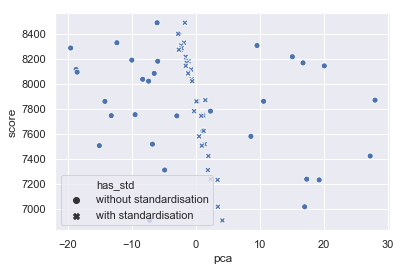

In [104]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df1 = pd.DataFrame({
    'score': olympic_score.x,
    'pca': pca_first_vec,
    'has_std': ['without standardisation']*len(pca_first_vec)
                   })
df2 = pd.DataFrame({
    'score': olympic_score.x,
    'pca': pca_std_first_vec,
    'has_std': ['with standardisation']*len(pca_std_first_vec)
                   })

df = pd.concat([df1, df2])

sns.scatterplot(x="pca", y="score", data = df, style = "has_std")

上記のグラフは、10種競技のスコアと、PCAの第一主成分の値を散布図にしたものである。丸い点が正規化なしのデータでPCAを当てはめたもの、バツ印の点が正規化したデータでPCAをあたはめたものとなっている。グラフからも見て取れる通り、正規化後のデータを使った方が、実際の10種競技のスコアとうまく相関しているように観察できる。このことは、正規化によって多変量データの持つ特徴を強調できた結果だと考えられる。

以上、正規化によって特徴が希釈化される場合と、強調される場合を、実例を用いて分析を行った。